In [2]:
import torch

def check_gpu():
    """
    Check if PyTorch can successfully use the GPU and print detailed information.
    """
    print(f"PyTorch version: {torch.__version__}")

    # 1. Core check: torch.cuda.is_available()
    #    This is the most direct way to check if CUDA (NVIDIA's GPU computing platform) is available.
    is_available = torch.cuda.is_available()

    print(f"Is CUDA available: {is_available}")

    if is_available:
        # 2. If available, get and print more GPU information
        gpu_count = torch.cuda.device_count()
        current_gpu_index = torch.cuda.current_device()
        current_gpu_name = torch.cuda.get_device_name(current_gpu_index)

        print("\n--- GPU Details ---")
        print("Congratulations! PyTorch has successfully connected to the GPU.")
        print(f"Number of available GPUs: {gpu_count}")
        print(f"Current GPU index: {current_gpu_index}")
        print(f"Current GPU name: {current_gpu_name}")

        # Create a tensor and move it to the GPU for final verification
        try:
            tensor = torch.tensor([1.0, 2.0]).to("cuda")
            print("\nFinal verification: Successfully moved tensor to GPU.")
            print(f"Tensor device: {tensor.device}")
        except Exception as e:
            print(f"\nFinal verification failed: Error occurred when moving tensor to GPU: {e}")

    else:
        print("\n--- Conclusion ---")
        print("No available GPU found. PyTorch will use the CPU for computation.")
        print("This explains the 'pin_memory' warning you saw earlier.")

if __name__ == "__main__":
    check_gpu()

PyTorch version: 2.6.0+cu126
Is CUDA available: True

--- GPU Details ---
Congratulations! PyTorch has successfully connected to the GPU.
Number of available GPUs: 1
Current GPU index: 0
Current GPU name: NVIDIA GeForce RTX 4070 Ti SUPER

Final verification: Successfully moved tensor to GPU.
Tensor device: cuda:0


"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf"

In [ ]:
import logging
from pathlib import Path
import json
import sys

# -------------------[ Docling Imports ]-------------------
# Imports based on the 'compare_vlm_models.py' example script
# Remove the problematic ImageRefMode import since it's causing the AttributeError
# from docling_core.types.doc import ImageRefMode

from docling.datamodel import vlm_model_specs
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import VlmPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# -------------------[ Main Processing Function ]-------------------
def run_smoldocling_pipeline(pdf_path_str: str, output_dir_name: str = "output_smoldocling"):
    """
    A robust pipeline based on the compare_vlm_models.py example, simplified
    to use only the SmolDocling model and correctly save all output files.

    Args:
        pdf_path_str (str): The path to the PDF file.
        output_dir_name (str): The name for the output directory.
    """
    pdf_path = Path(pdf_path_str)
    if not pdf_path.is_file():
        logging.error(f"❌ File not found: {pdf_path}")
        return

    # --- Step 1: Setup Directories ---
    output_dir = Path(output_dir_name)
    images_dir = output_dir / "images"  # Directory to save extracted image files
    output_dir.mkdir(parents=True, exist_ok=True)
    images_dir.mkdir(exist_ok=True)
    logging.info(f"Output will be saved in: {output_dir.resolve()}")

    # --- Step 2: Configure the SmolDocling Pipeline ---
    logging.info("⚙️  Configuring pipeline to use SmolDocling...")
    
    # Explicitly select the SmolDocling model that uses the Transformers framework.
    # This is platform-independent (unlike MLX which is for Apple Silicon).
    smoldocling_model_options = vlm_model_specs.SMOLDOCLING_TRANSFORMERS

    # Set up the main pipeline options
    pipeline_options = VlmPipelineOptions()
    pipeline_options.generate_page_images = True # Crucial for making images available
    pipeline_options.vlm_options = smoldocling_model_options

    # Set up the converter, specifying the VlmPipeline class as seen in the example
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_cls=VlmPipeline,
                pipeline_options=pipeline_options,
            ),
        },
    )

    # --- Step 3: Convert the Document ---
    logging.info(f"🚀 Starting document conversion for: {pdf_path.name}")
    try:
        result = converter.convert(pdf_path)
        document = result.document
        logging.info("✅ VLM pipeline analysis complete.")
    except Exception as e:
        logging.error(f"A critical error occurred during Docling conversion: {e}", exc_info=True)
        return

    # --- Step 4: Save All Output Files Correctly ---
    logging.info(f"💾 Saving output files to '{output_dir.name}' directory...")
    
    # Define a base filename for all outputs
    fname_base = f"{pdf_path.stem}-{smoldocling_model_options.repo_id.replace('/', '_')}"

    # Save as JSON
    json_path = output_dir / f"{fname_base}.json"
    document.save_as_json(json_path)
    logging.info(f"   => Saved JSON: {json_path.name}")

    # Save as Markdown - remove image_dir parameter as it's not supported
    md_path = output_dir / f"{fname_base}.md"
    document.save_as_markdown(md_path)
    logging.info(f"   => Saved Markdown: {md_path.name}")

    # Save as HTML - remove image_dir parameter as it's not supported
    html_path = output_dir / f"{fname_base}.html"
    document.save_as_html(html_path)
    logging.info(f"   => Saved HTML: {html_path.name}")
    logging.info(f"   => Images extracted to: {images_dir.name}/")
    
    logging.info("🎉 All files generated successfully!")


# -------------------[ Script Execution ]-------------------
if __name__ == "__main__":
    # --- Please specify the path to your PDF file here ---
    PDF_FILE_TO_PROCESS = "C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf"
    
    run_smoldocling_pipeline(PDF_FILE_TO_PROCESS)


2025-07-07 18:34:57,384 - INFO - Output will be saved in: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_smoldocling
2025-07-07 18:34:57,385 - INFO - ⚙️  Configuring pipeline to use SmolDocling...
2025-07-07 18:34:57,386 - INFO - 🚀 Starting document conversion for: 1-s2.0-S1385110124000054-main.pdf
2025-07-07 18:34:57,387 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-07 18:34:57,401 - INFO - Going to convert document batch...
2025-07-07 18:34:57,401 - INFO - Initializing pipeline for VlmPipeline with options hash 75529f57132c23f83dea4e9a249e41d3
2025-07-07 18:34:57,404 - INFO - Accelerator device: 'cuda:0'
2025-07-07 18:34:58,051 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) 

In [ ]:
# SmolDocling Model Comparison
# ===========================
#
# This example runs the VLM pipeline with SmolDocling models only.
# Their runtime as well output quality is compared.

import json
import sys
import time
from pathlib import Path

from docling_core.types.doc import DocItemLabel, ImageRefMode
from docling_core.types.doc.document import DEFAULT_EXPORT_LABELS
from tabulate import tabulate

from docling.datamodel import vlm_model_specs
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    VlmPipelineOptions,
)
from docling.datamodel.pipeline_options_vlm_model import InferenceFramework
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline


def convert(sources: list[Path], converter: DocumentConverter):
    model_id = pipeline_options.vlm_options.repo_id.replace("/", "_")
    framework = pipeline_options.vlm_options.inference_framework
    for source in sources:
        print("================================================")
        print("Processing...")
        print(f"Source: {source}")
        print("---")
        print(f"Model: {model_id}")
        print(f"Framework: {framework}")
        print("================================================")
        print("")

        res = converter.convert(source)

        print("")

        fname = f"{res.input.file.stem}-{model_id}-{framework}"

        inference_time = 0.0
        for i, page in enumerate(res.pages):
            inference_time += page.predictions.vlm_response.generation_time
            print("")
            print(
                f" ---------- Predicted page {i} in {pipeline_options.vlm_options.response_format} in {page.predictions.vlm_response.generation_time} [sec]:"
            )
            print(page.predictions.vlm_response.text)
            print(" ---------- ")

        print("===== Final output of the converted document =======")

        with (out_path / f"{fname}.json").open("w") as fp:
            fp.write(json.dumps(res.document.export_to_dict()))

        res.document.save_as_json(
            out_path / f"{fname}.json",
            image_mode=ImageRefMode.PLACEHOLDER,
        )
        print(f" => produced {out_path / fname}.json")

        res.document.save_as_markdown(
            out_path / f"{fname}.md",
            image_mode=ImageRefMode.PLACEHOLDER,
        )
        print(f" => produced {out_path / fname}.md")

        res.document.save_as_html(
            out_path / f"{fname}.html",
            image_mode=ImageRefMode.EMBEDDED,
            labels=[*DEFAULT_EXPORT_LABELS, DocItemLabel.FOOTNOTE],
            split_page_view=True,
        )
        print(f" => produced {out_path / fname}.html")

        pg_num = res.document.num_pages()
        print("")
        print(
            f"Total document prediction time: {inference_time:.2f} seconds, pages: {pg_num}"
        )
        print("====================================================")

        return [
            source,
            model_id,
            str(framework),
            pg_num,
            inference_time,
        ]


if __name__ == "__main__":
    sources = [
        "C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf",
    ]

    out_path = Path("scratch")
    out_path.mkdir(parents=True, exist_ok=True)

    ## Use VlmPipeline
    pipeline_options = VlmPipelineOptions()
    pipeline_options.generate_page_images = True

    ## On GPU systems, enable flash_attention_2 with CUDA:
    # pipeline_options.accelerator_options.device = AcceleratorDevice.CUDA
    # pipeline_options.accelerator_options.cuda_use_flash_attention2 = True

    # Only SmolDocling models
    vlm_models = [
        ## SmolDocling models
        vlm_model_specs.SMOLDOCLING_MLX,
        vlm_model_specs.SMOLDOCLING_TRANSFORMERS,
    ]

    # Remove MLX models if not on Mac
    if sys.platform != "darwin":
        vlm_models = [
            m for m in vlm_models if m.inference_framework != InferenceFramework.MLX
        ]

    rows = []
    for vlm_options in vlm_models:
        pipeline_options.vlm_options = vlm_options

        ## Set up pipeline for PDF or image inputs
        converter = DocumentConverter(
            format_options={
                InputFormat.PDF: PdfFormatOption(
                    pipeline_cls=VlmPipeline,
                    pipeline_options=pipeline_options,
                ),
                InputFormat.IMAGE: PdfFormatOption(
                    pipeline_cls=VlmPipeline,
                    pipeline_options=pipeline_options,
                ),
            },
        )

        row = convert(sources=sources, converter=converter)
        rows.append(row)

        print(
            tabulate(
                rows, headers=["source", "model_id", "framework", "num_pages", "time"]
            )
        )

        print("see if memory gets released ...")
        time.sleep(10)

2025-07-07 19:09:36,905 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-07 19:09:36,911 - INFO - Going to convert document batch...
2025-07-07 19:09:36,911 - INFO - Initializing pipeline for VlmPipeline with options hash 75529f57132c23f83dea4e9a249e41d3
2025-07-07 19:09:36,914 - INFO - Accelerator device: 'cuda:0'


Processing...
Source: C:\Users\Hongyu\Desktop\1-s2.0-S1385110124000054-main.pdf
---
Model: ds4sd_SmolDocling-256M-preview
Framework: InferenceFramework.TRANSFORMERS



2025-07-07 19:09:37,639 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
d:\Anaconda\envs\torch260\Lib\site-packages\transformers\generation\configuration_utils.py:629: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
2025-07-07 19:20:20,160 - INFO - Finished converting document 1-s2.0-S1385110124000054-main.pdf in 643.27 sec.
2025-07-07 19:20:20,261 - WARNING - Could not parse formula with MathML




 ---------- Predicted page 0 in ResponseFormat.DOCTAGS in 38.852702140808105 [sec]:
Assistant: <doctag><picture><loc_30><loc_39><loc_83><loc_84><logo></picture>
<page_header><loc_190><loc_23><loc_310><loc_28>Journal of Sea Research 198 (2024) 102472</page_header>
<text><loc_192><loc_40><loc_310><loc_45>Contents lists available at ScienceDirect</text>
<section_header_level_1><loc_189><loc_54><loc_314><loc_63>Journal of Sea Research</section_header_level_1>
<text><loc_169><loc_74><loc_333><loc_80>journal homepage: www.elsevier.com/locate/seares</text>
<text><loc_31><loc_105><loc_413><loc_124>Time series prediction of sea surface temperature based on BiLSTM model with attention mechanism</text>
<text><loc_31><loc_132><loc_331><loc_139>Nabila Zirra $^{a}$, Assia Kamal-Idrissi, Rahma Farsi $^{c}$, Haris Ahmad Khan d, e,</text>
<text><loc_31><loc_145><loc_247><loc_150>$^{a}$National Superior School of Mines Rabat, LISTD Laboratory, ADOS Team, Rabat, Morocco</text>
<unordered_list><list_ite

# Picture Description

r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\1-s2.0-S1385110124000054-main.pdf"

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]


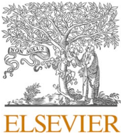
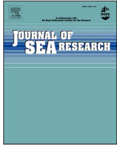
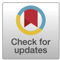
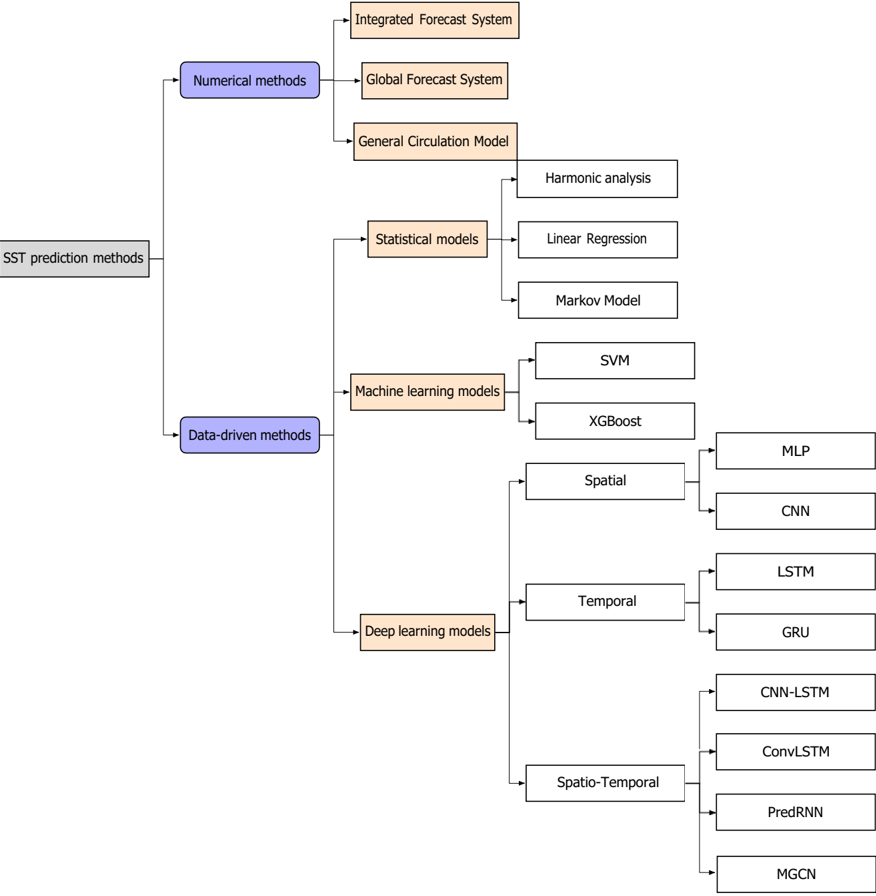
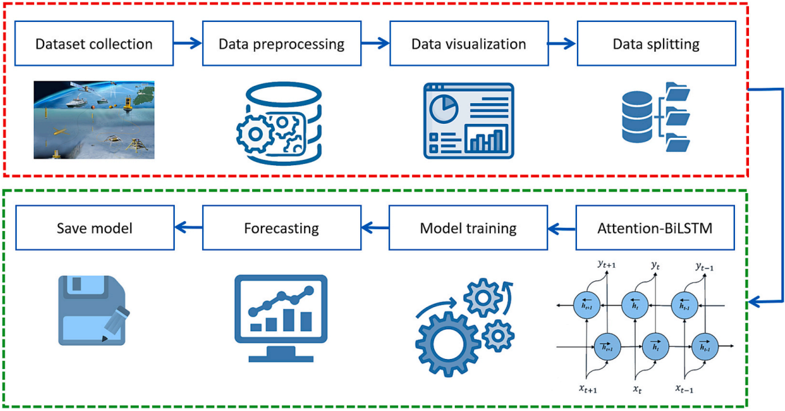
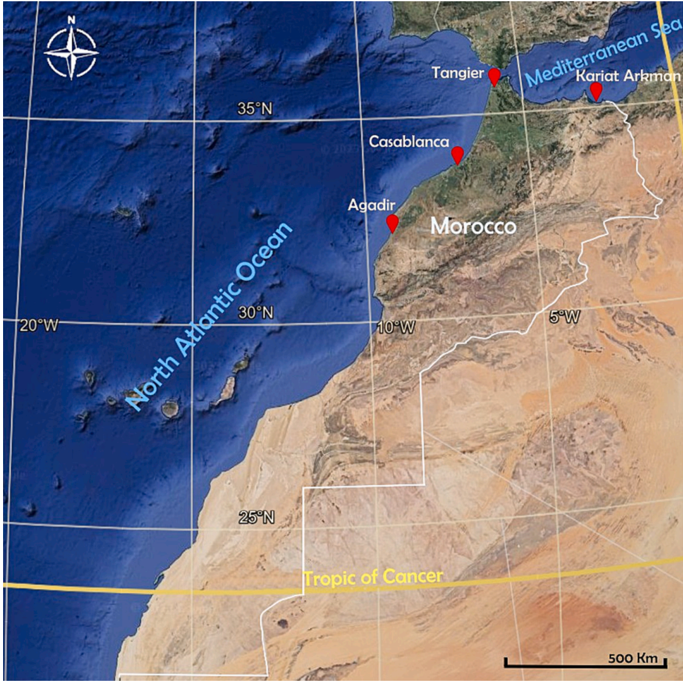
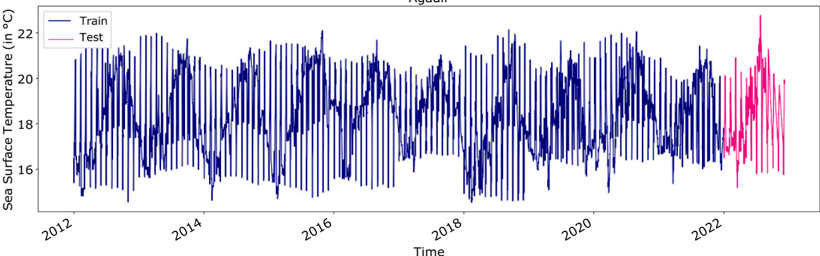
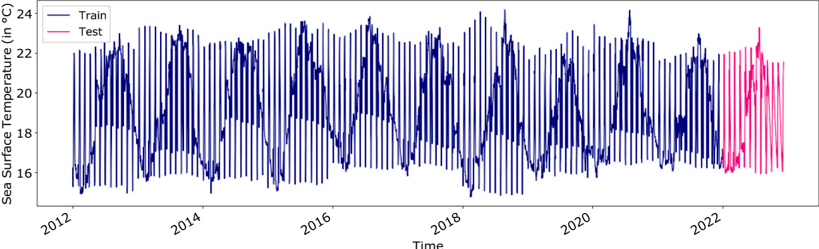
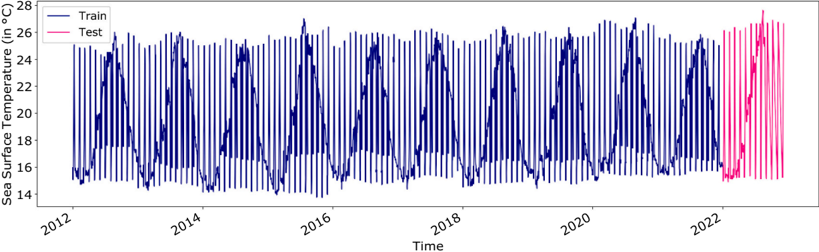
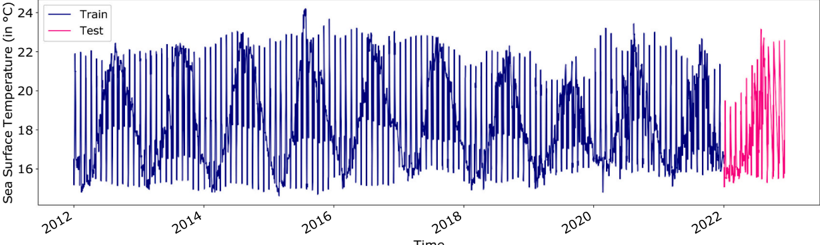
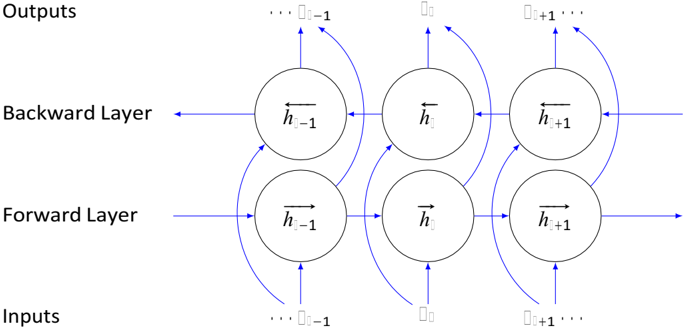
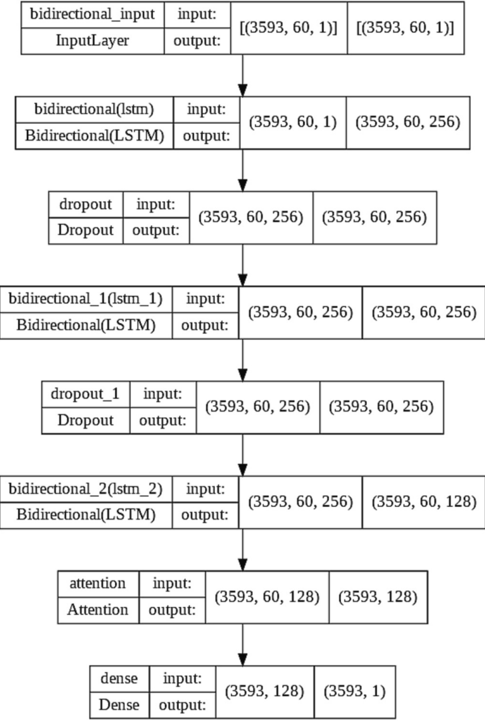
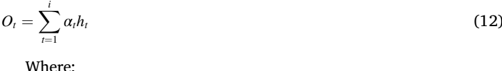
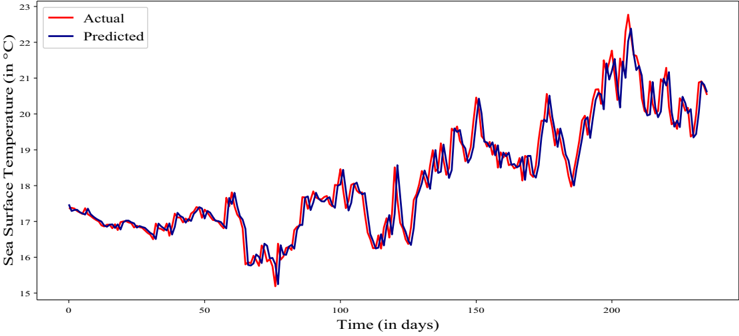
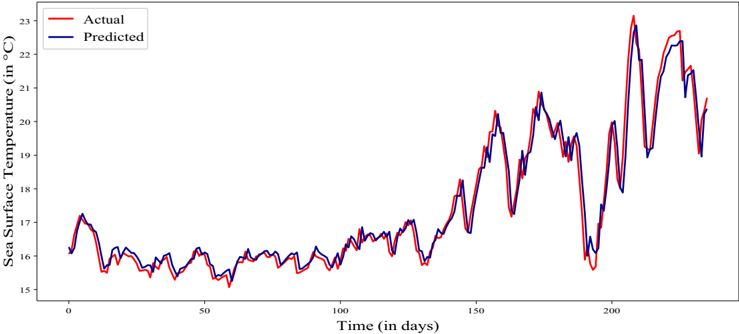
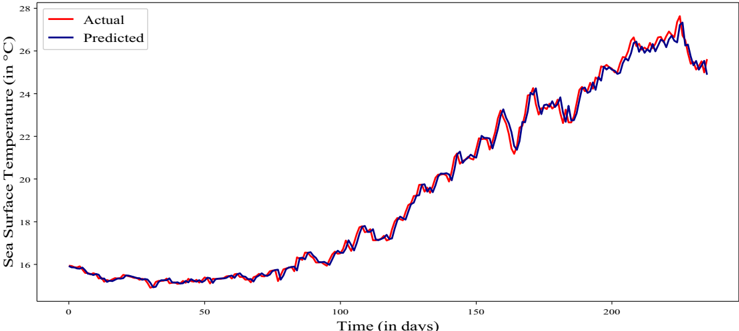
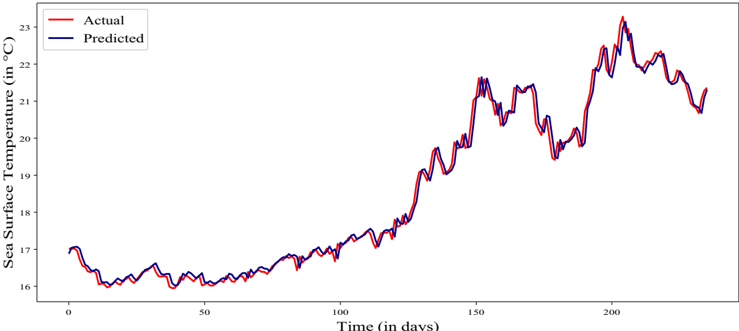

In [2]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
# The source document
DOC_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\1-s2.0-S1385110124000054-main.pdf"

from docling.datamodel.pipeline_options import PictureDescriptionVlmOptions

pipeline_options = PdfPipelineOptions()
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = PictureDescriptionVlmOptions(
    repo_id="Qwen/Qwen2.5-VL-7B-Instruct",  # <-- add here the Hugging Face repo_id of your favorite VLM
    prompt="Describe the image in five sentences. Be consise and accurate.",
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)
doc = converter.convert(DOC_SOURCE).document
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display all pictures and their captions and annotations:
for pic in doc.pictures:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

In [ ]:
import logging
from pathlib import Path
import json

# --- Docling Imports ---
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import VlmPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Main PDF Conversion Function ---
def convert_pdf_with_lmstudio(pdf_path_str: str, output_dir_str: str = "output_lmstudio_conversion"):
    """
    Uses a model served by LM Studio to perform a full conversion of a PDF document,
    then saves the results in JSON format only.

    Args:
        pdf_path_str (str): The path to the source PDF file.
        output_dir_str (str): The directory to save the output files.
    """
    pdf_path = Path(pdf_path_str)
    if not pdf_path.is_file():
        logging.error(f"❌ File not found: {pdf_path}")
        return

    # --- Step 1: Setup Directories ---
    output_dir = Path(output_dir_str)
    output_dir.mkdir(parents=True, exist_ok=True)
    logging.info(f"Output will be saved in: {output_dir.resolve()}")

    # --- Step 2: Configure the VLM Pipeline to use LM Studio ---
    # IMPORTANT: This model identifier must EXACTLY match the one loaded in LM Studio.
    model_identifier = "google/gemma-3-12b-it-gguf"
    
    logging.info(f"⚙️  Configuring VLM Pipeline to use '{model_identifier}' on LM Studio...")

    # Define the connection and model parameters for the LM Studio API
    pipeline_options = VlmPipelineOptions(
        url="http://localhost:1234/v1/chat/completions",
        model=model_identifier,
        prompt="Parse the document.",
        params={"max_tokens": 16384},
        generate_page_images=True  # This is essential
    )

    # --- Step 3: Initialize the Document Converter ---
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_cls=VlmPipeline,
                pipeline_options=pipeline_options,
            ),
        },
    )

    # --- Step 4: Run the Conversion ---
    logging.info(f"🚀 Starting PDF conversion for: {pdf_path.name}")
    try:
        result = converter.convert(pdf_path)
        document = result.document
        logging.info("✅ PDF conversion complete.")
    except Exception as e:
        logging.error(f"A critical error occurred during conversion. Is the LM Studio server running with model '{model_identifier}' loaded?", exc_info=True)
        return

    # --- Step 5: Save JSON Output ---
    logging.info(f"💾 Saving JSON output to '{output_dir.name}' directory...")
    
    # Define a base filename for the output files
    fname_base = f"{pdf_path.stem}-{model_identifier.replace('/', '_')}"

    # Save as a structured JSON file
    json_path = output_dir / f"{fname_base}.json"
    document.save_as_json(json_path)
    logging.info(f"   => Saved JSON: {json_path.name}")
    
    logging.info("🎉 JSON file generated successfully!")

# -------------------[ Script Execution ]-------------------
if __name__ == "__main__":
    # Define the source PDF file to be processed
    PDF_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf"
    
    # Run the main conversion function
    convert_pdf_with_lmstudio(PDF_SOURCE)

2025-07-14 18:34:26,097 - INFO - Output will be saved in: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion
2025-07-14 18:34:26,097 - INFO - ⚙️  Configuring VLM Pipeline to use 'google/gemma-3-12b-it-gguf' on LM Studio...
2025-07-14 18:34:26,099 - INFO - 🚀 Starting PDF conversion for: 1-s2.0-S1385110124000054-main.pdf
2025-07-14 18:34:26,100 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-14 18:34:26,112 - INFO - Going to convert document batch...
2025-07-14 18:34:26,112 - INFO - Initializing pipeline for VlmPipeline with options hash 75529f57132c23f83dea4e9a249e41d3
2025-07-14 18:34:26,115 - INFO - Accelerator device: 'cuda:0'
2025-07-14 18:34:26,918 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you en

Hugging Face Model Directory: C:\Users\Hongyu\.cache\huggingface\hub